Name: Vo Van Viet 

ID: ITDSIU18043

### I. For this assignment, you are required to rely on the Breast Cancer Wisconsin (Diagnostic) Database to answer these questions below:
**1. How many features does the breast cancer dataset have? Print out all feature names** </br>
**2. Convert the `sklearn.dataset` cancer to a DataFrame. Your answer should return a `(569, 31)` DataFrame with first 30 columns are all the features and the last column is corresponding with the label extracted from `cancer['target']`** </br>
**3. What is the class distribution? (i.e. how many instances of `malignant` (encoded 0) and how many `benign` (encoded 1)?)
*This function should return a Series named `target` of length 2 with integer values and index =* `['malignant', 'benign']`**


### First of all, let read through the description of the dataset (below). Pay attention to the keys of the data.

In [13]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print(cancer.DESCR) # Print the data set description
cancer.keys()

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [14]:
# I.1 
print('Number of features:', len(cancer['feature_names']))
print('Feature Names:', cancer.feature_names )

Number of features: 30
Feature Names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [15]:
# I.2 
import numpy as np
df = pd.concat([pd.DataFrame(cancer.data), pd.DataFrame(cancer.target)], axis=1)
df.columns = np.append(cancer.feature_names,'target')
df.shape

(569, 31)

In [16]:
# I.3 
def answer_I3():

    cancerdf = df
    counts = cancerdf.target.value_counts(ascending=True)
    counts.index = ['benign','malignant']
    return counts

In [17]:
answer_I3()

benign       212
malignant    357
Name: target, dtype: int64

### II. Using the same data from assignment I, do the following requirements:

**1. Split the DataFrame into `X` (the data) and `y` (the labels).** </br>
**2. Using `train_test_split`, split `X` and `y` into training and test sets `(X_train, X_test, y_train, and y_test)`.
Set the random number generator state to 0 using `random_state=0` to make sure your results match the autograder!**

In [18]:
# II.1
X = df[df.columns[:-1]]
y = df.target
print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [19]:
# Or
X = df.drop('target', axis=1)
y = df.get('target')
print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [20]:
# II.2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(426, 30)
(143, 30)
(426,)
(143,)


### III. Using pipeline in `sklearn` to stack the data pipeline including `StandardScaler`, `PCA` (with `n_components=7`) and using `LogisticRegression` to build the ML model. Then compute and print out the test accuracy

In [22]:
# III
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=7)),
                    ('clf', LogisticRegression())])

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)

In [23]:
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.958


### IV. Using the same pipeline as above but for the case of using also cross validation (cv) in `sklearn` and apply the learning model `RandomForestClassifier` instead. Then calculate and print out cv accuracy and confident interval of the cv accuracy

In [24]:
# IV
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print('CV accuracy scores:', scores)
lowerbound=np.mean(scores)-np.std(scores)
upperbound=np.mean(scores)+np.std(scores)
print('Mean CV accuracy score: %.3f ' %scores.mean())
print('Confident Interval for CV accuracy: (%.3f ; %.3f)' % (lowerbound,upperbound))

CV accuracy scores: [1.         0.97674419 0.97674419 1.         0.93023256 0.95348837
 0.97619048 0.97619048 0.95238095 0.97619048]
Mean CV accuracy score: 0.972 
Confident Interval for CV accuracy: (0.951 ; 0.992)


In [25]:
from sklearn.ensemble import RandomForestClassifier

pipe_rf = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=7)),
                    ('clf', RandomForestClassifier())])
scores = cross_val_score(estimator=pipe_rf,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print('CV accuracy scores:', scores)
lowerbound=np.mean(scores)-np.std(scores)
upperbound=np.mean(scores)+np.std(scores)
print('Mean CV accuracy score: %.3f ' %scores.mean())
print('Confident Interval for CV accuracy: (%.3f ; %.3f)' % (lowerbound,upperbound))

CV accuracy scores: [0.95348837 0.93023256 0.93023256 1.         0.93023256 0.95348837
 1.         0.97619048 0.97619048 0.9047619 ]
Mean CV accuracy score: 0.955 
Confident Interval for CV accuracy: (0.925 ; 0.986)


### V. This assignment require you to implement from scratch a simple neural network architecture that can map 2 dimensional input vectors onto binary output values. Our network will have 2 input neurons, one hidden layer with 10 hidden neurons and an output layer with 1 output neuron.

### Loss Function

We will use the same loss function as in logistic regression:

\begin{equation}
J(\boldsymbol{w},b) = - \frac{1}{m} \sum_{i=1}^m \Big[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \big(1 - \log(\hat{y}^{(i)})\big) \Big] 
\end{equation}

For a classification task with more than two classes, we would use a generalization of this function, namely the categorical cross-entropy.

### Training

We will train our network with gradient descent and we will use backpropagation to compute the required partial derivatives. The training procedure has the following steps:  
1. Initialize the parameters (i.e. the weights and biases)  
2. Repeat until convergence:  
  2.1. Propagate the current input batch forward through the network. To do so, compute the activations and outputs of all hidden and output units.  
  2.2 Compute the partial derivatives of the loss function with respect to each parameter  
  2.3 Update the parameters

### Then you are requested to apply your model to train a classifier for below data:

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
np.random.seed(123)

% matplotlib inline

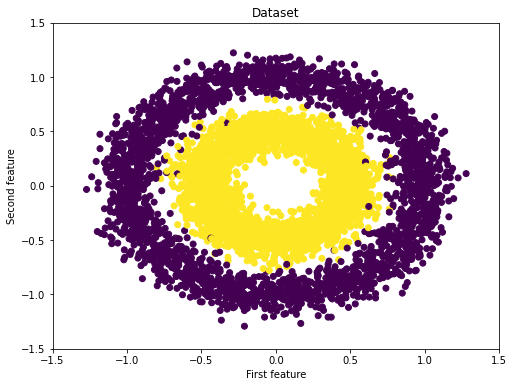

In [27]:
X, y = make_circles(n_samples=5000, factor=0.5, noise=.1)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [28]:
y_true = y[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, y_true)
print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape}')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape X_train: (3750, 2)
Shape y_train: (3750, 1)
Shape X_test: (1250, 2)
Shape y_test: (1250, 1)


In [29]:
class NeuralNet():
    
    def __init__(self, n_inputs, n_outputs, n_hidden):
        self.n_inputs = n_inputs
        self.n_outputs = n_outputs
        self.hidden = n_hidden

        # Initialize weight matrices and bias vectors
        self.W_h = np.random.randn(self.n_inputs, self.hidden)
        self.b_h = np.zeros((1, self.hidden))
        self.W_o = np.random.randn(self.hidden, self.n_outputs)
        self.b_o = np.zeros((1, self.n_outputs))

    def sigmoid(self, a):
        return 1 / (1 + np.exp(-a))

    def forward_pass(self, X):
        """
        Propagates the given input X forward through the net.

        Returns:
            A_h: matrix with activations of all hidden neurons for all input examples
            O_h: matrix with outputs of all hidden neurons for all input examples
            A_o: matrix with activations of all output neurons for all input examples
            O_o: matrix with outputs of all output neurons for all input examples
        """
        # Compute activations and outputs of hidden units
        A_h = np.dot(X, self.W_h) + self.b_h
        O_h = np.tanh(A_h)

        # Compute activations and outputs of output units
        A_o = np.dot(O_h, self.W_o) + self.b_o
        O_o = self.sigmoid(A_o)

        outputs = {
                "A_h": A_h,
                "A_o": A_o,
                "O_h": O_h,
                "O_o": O_o,
                }

        return outputs


    def cost(self, y_true, y_predict, n_samples):
        """
        Computes and returns the cost over all examples
        """
        # same cost function as in logistic regression
        cost = (- 1 / n_samples) * np.sum(y_true * np.log(y_predict) + (1 - y_true) * (np.log(1 - y_predict)))
        cost = np.squeeze(cost)
        assert isinstance(cost, float)

        return cost

    def backward_pass(self,  X, Y, n_samples, outputs):
        """
        Propagates the errors backward through the net.

        Returns:
            dW_h: partial derivatives of loss function w.r.t hidden weights
            db_h: partial derivatives of loss function w.r.t hidden bias
            dW_o: partial derivatives of loss function w.r.t output weights
            db_o: partial derivatives of loss function w.r.t output bias
        """

        dA_o = (outputs["O_o"] - Y)
        dW_o = (1 / n_samples) * np.dot(outputs["O_h"].T, dA_o)
        db_o = (1 / n_samples) * np.sum(dA_o)

        dA_h = (np.dot(dA_o, self.W_o.T)) * (1 - np.power(outputs["O_h"], 2))
        dW_h = (1 / n_samples) * np.dot(X.T, dA_h)
        db_h = (1 / n_samples) * np.sum(dA_h)

        gradients = {
                "dW_o": dW_o,
                "db_o": db_o,
                "dW_h": dW_h,
                "db_h": db_h,
                }

        return gradients

    def update_weights(self, gradients, eta):
        """
        Updates the model parameters using a fixed learning rate
        """
        self.W_o = self.W_o - eta * gradients["dW_o"]
        self.W_h = self.W_h - eta * gradients["dW_h"]
        self.b_o = self.b_o - eta * gradients["db_o"]
        self.b_h = self.b_h - eta * gradients["db_h"]

    def train(self, X, y, n_iters=500, eta=0.3):
        """
        Trains the neural net on the given input data
        """
        n_samples, _ = X.shape

        for i in range(n_iters):
            outputs = self.forward_pass(X)
            cost = self.cost(y, outputs["O_o"], n_samples=n_samples)
            gradients = self.backward_pass(X, y, n_samples, outputs)

            if i % 100 == 0:
                print(f'Cost at iteration {i}: {np.round(cost, 4)}')

            self.update_weights(gradients, eta)


    def predict(self, X):
        """
        Computes and returns network predictions for given dataset
        """
        outputs = self.forward_pass(X)
        y_pred = [1 if elem >= 0.5 else 0 for elem in outputs["O_o"]]

        return np.array(y_pred)[:, np.newaxis]

In [30]:
nn = NeuralNet(n_inputs=2, n_hidden=10, n_outputs=1)
print("Shape of weight matrices and bias vectors:")
print(f'W_h shape: {nn.W_h.shape}')
print(f'b_h shape: {nn.b_h.shape}')
print(f'W_o shape: {nn.W_o.shape}')
print(f'b_o shape: {nn.b_o.shape}')
print()

print("Training:")
nn.train(X_train, y_train, n_iters=5000, eta=0.7)

Shape of weight matrices and bias vectors:
W_h shape: (2, 10)
b_h shape: (1, 10)
W_o shape: (10, 1)
b_o shape: (1, 1)

Training:
Cost at iteration 0: 0.8801
Cost at iteration 100: 0.3823
Cost at iteration 200: 0.1566
Cost at iteration 300: 0.0998
Cost at iteration 400: 0.0758
Cost at iteration 500: 0.0623
Cost at iteration 600: 0.0536
Cost at iteration 700: 0.0478
Cost at iteration 800: 0.0437
Cost at iteration 900: 0.0407
Cost at iteration 1000: 0.0385
Cost at iteration 1100: 0.0367
Cost at iteration 1200: 0.0352
Cost at iteration 1300: 0.034
Cost at iteration 1400: 0.033
Cost at iteration 1500: 0.0321
Cost at iteration 1600: 0.0314
Cost at iteration 1700: 0.0307
Cost at iteration 1800: 0.0301
Cost at iteration 1900: 0.0295
Cost at iteration 2000: 0.029
Cost at iteration 2100: 0.0286
Cost at iteration 2200: 0.0281
Cost at iteration 2300: 0.0277
Cost at iteration 2400: 0.0274
Cost at iteration 2500: 0.027
Cost at iteration 2600: 0.0267
Cost at iteration 2700: 0.0264
Cost at iteration 2

In [31]:
n_test_samples, _ = X_test.shape
y_predict = nn.predict(X_test)
print(f"Classification accuracy on test set: {(np.sum(y_predict == y_test)/n_test_samples)*100} %")

Classification accuracy on test set: 98.8 %


### VI. Consider the digit dataset as in the following code cell. This is the hand-written digit dataset and it is included in `sklearn`. Please do the these below tasks:

**1. Print out the couple of class names and corresponding number of sample in this class (class counts)** </br>
**2. Creating new label for this dataset with the new rule:  Negative class (0) is `not digit 1` and Positive class (1) is `digit 1`.**  </br>
**3. Using SVM model to train a binary classifier to classify the Positive v.s Negative class in the dataset with new label as in task 2. In more detail, let split the dataset to train and test datasets with the ratio 80/20, then train your model in using train dataset and evaluate the model in test dataset using `score` in `sklearn`.**

In [32]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

dataset = load_digits()
X, y = dataset.data, dataset.target
print(X.shape)

(1797, 64)


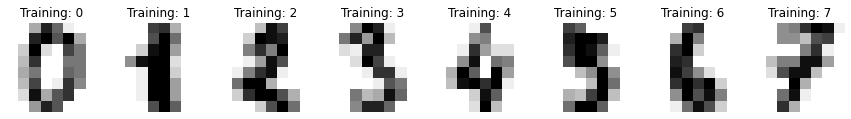

In [33]:
import matplotlib.pyplot as plt 
_, axes = plt.subplots(nrows=1, ncols=8, figsize=(15, 8))
for ax, image, label in zip(axes, dataset.images, dataset.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [34]:
# V.1
for class_name, class_count in zip(dataset.target_names, np.bincount(dataset.target)):
    print('Class name: %d number of sample: %d' %(class_name,class_count))


Class name: 0 number of sample: 178
Class name: 1 number of sample: 182
Class name: 2 number of sample: 177
Class name: 3 number of sample: 183
Class name: 4 number of sample: 181
Class name: 5 number of sample: 182
Class name: 6 number of sample: 181
Class name: 7 number of sample: 179
Class name: 8 number of sample: 174
Class name: 9 number of sample: 180


In [35]:
# V.2
y_new = y.copy()
y_new[y_new != 1] = 0

print('Original labels:\t', y[1:30])
print('New binary labels:\t', y_new[1:30])

Original labels:	 [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
New binary labels:	 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [36]:
# V.3
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size=0.2, random_state=0)

# Accuracy of Support Vector Machine classifier
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1).fit(X_train, y_train)
test_score=svm.score(X_test, y_test)
train_score=svm.score(X_train, y_train)

In [37]:
print("Classification accuracy on train set:", train_score)
print("Classification accuracy on test set:", test_score)

Classification accuracy on train set: 0.9993041057759221
Classification accuracy on test set: 0.9944444444444445
